In [1]:
import numpy as np 
import pandas as pd
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

#### **Loading Data**

In [2]:
df = pd.read_csv('customer_dataset.csv')
df.head()

/tmp/ipykernel_1937/2201250431.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('customer_dataset.csv')


,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790,1.11,2.84
1,2,176875,15.74,33.83
2,3,6812,2.11,NaN
3,4,38542,7.82,10.73
4,5,48712,7.51,10.04


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570000 entries, 0 to 569999
Data columns (total 4 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   customer_id                      570000 non-null  int64  
 1   average_monthly_spend            560614 non-null  object 
 2   average_monthly_visit_frequency  560672 non-null  object 
 3   average_monthly_basket_size      560714 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 17.4+ MB


In [4]:
df.shape

(570000, 4)

#### **Cleanin Data**

In [5]:
def convert_to_float_and_find_errors(dataframe, column):
    """
      This function assumes that the input DataFrame contains valid data types that can be converted to float.
      If the value in the specified column cannot be converted to float, the row index and original value are recorded.
    """

    error_rows = []
    for index, value in dataframe[column].items():
        try:
            float(value)
        except ValueError:
            error_rows.append((index, value))
    return error_rows



# average_monthly_spend
error_rows = convert_to_float_and_find_errors(df, 'average_monthly_spend')
print("Rows causing ValueError:")
for index, value in error_rows:
    print(f"Index: {index}, Value: {value}")

df = df.drop([index for index, value in error_rows])

# average_monthly_visit_frequency
error_rows = convert_to_float_and_find_errors(df, 'average_monthly_visit_frequency')
print("Rows causing ValueError:")
for index, value in error_rows:
    print(f"Index: {index}, Value: {value}")

df = df.drop([index for index, value in error_rows])

# average_monthly_basket_size
error_rows = convert_to_float_and_find_errors(df, 'average_monthly_basket_size')
print("Rows causing ValueError:")
for index, value in error_rows:
    print(f"Index: {index}, Value: {value}")

df = df.drop([index for index, value in error_rows])
df.shape


Rows causing ValueError:
Index: 26, Value: nine hundred
Rows causing ValueError:
Index: 322986, Value: one point two
Index: 323648, Value: nine point five
Index: 324577, Value: two
Index: 326775, Value: twenty two
Index: 569999, Value: three point four
Rows causing ValueError:


(569994, 4)

In [6]:
"""
    dropping null values not make bigger change this will be inclueded in the technical report with proofs
"""

df_filled_o = df.dropna()

In [7]:
columns = ['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']

for column in columns:
    df_filled_o[column] = df_filled_o[column].astype(float)

df_filled_o.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541994 entries, 0 to 569998
Data columns (total 4 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   customer_id                      541994 non-null  int64  
 1   average_monthly_spend            541994 non-null  float64
 2   average_monthly_visit_frequency  541994 non-null  float64
 3   average_monthly_basket_size      541994 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 20.7 MB


/tmp/ipykernel_1937/2525735887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filled_o[column] = df_filled_o[column].astype(float)
/tmp/ipykernel_1937/2525735887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filled_o[column] = df_filled_o[column].astype(float)
/tmp/ipykernel_1937/2525735887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [8]:
def remove_negative_values(df):
    """
        This function removes rows that contain negative values in any of the columns.according to the
        prblem 0 and negative values should be anomalies.if customer never visits he could not spend money
        and also he could not have a basket size.
    """

    return df[(df > 0).all(axis=1)]

df_filled_o = remove_negative_values(df_filled_o)
df_filled_o.describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
count,541975.000000,5.419750e+05,541975.000000,541975.000000
mean,280049.884220,4.825872e+04,6.879492,13.294555
std,161668.858105,9.111184e+04,5.322376,12.039035
min,1.000000,1.000000e+00,1.000000,1.000000
25%,139956.500000,1.050000e+04,2.390000,3.800000
50%,280099.000000,3.195900e+04,5.600000,9.790000
75%,420110.500000,8.541500e+04,9.850000,17.490000
max,560000.000000,4.833000e+07,432.740000,385.040000


### **Engineer Features to use Later**

In [9]:
df_filled_o["average_monthly_spend_for_visits"] = df_filled_o["average_monthly_spend"] / df_filled_o["average_monthly_visit_frequency"]
df_filled_o["average_monthly_spend_for_basket"] = df_filled_o["average_monthly_spend"] / df_filled_o["average_monthly_basket_size"]

In [10]:
columns = ['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size','average_monthly_spend_for_visits', 'average_monthly_spend_for_basket']

In [11]:
df_filled_o = df_filled_o[df_filled_o['average_monthly_visit_frequency'] < 30]

### **Five Number Summery of the Dataset**

In [12]:
df_filled_o.describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,average_monthly_spend_for_visits,average_monthly_spend_for_basket
count,541972.000000,5.419720e+05,541972.000000,541972.000000,5.419720e+05,5.419720e+05
mean,280049.211540,4.825873e+04,6.878360,13.294537,6.150289e+03,3.543990e+03
std,161668.843004,9.111205e+04,5.287746,12.039012,3.757557e+04,1.615648e+04
min,1.000000,1.000000e+00,1.000000,1.000000,3.508772e-01,2.008032e-01
25%,139955.750000,1.050000e+04,2.390000,3.800000,4.057544e+03,2.369348e+03
50%,280097.500000,3.195900e+04,5.600000,9.790000,5.671767e+03,3.225277e+03
75%,420110.250000,8.541500e+04,9.850000,17.490000,8.498857e+03,4.637594e+03
max,560000.000000,4.833000e+07,19.990000,385.040000,2.700000e+07,1.145261e+07


### **Identify Outliers**

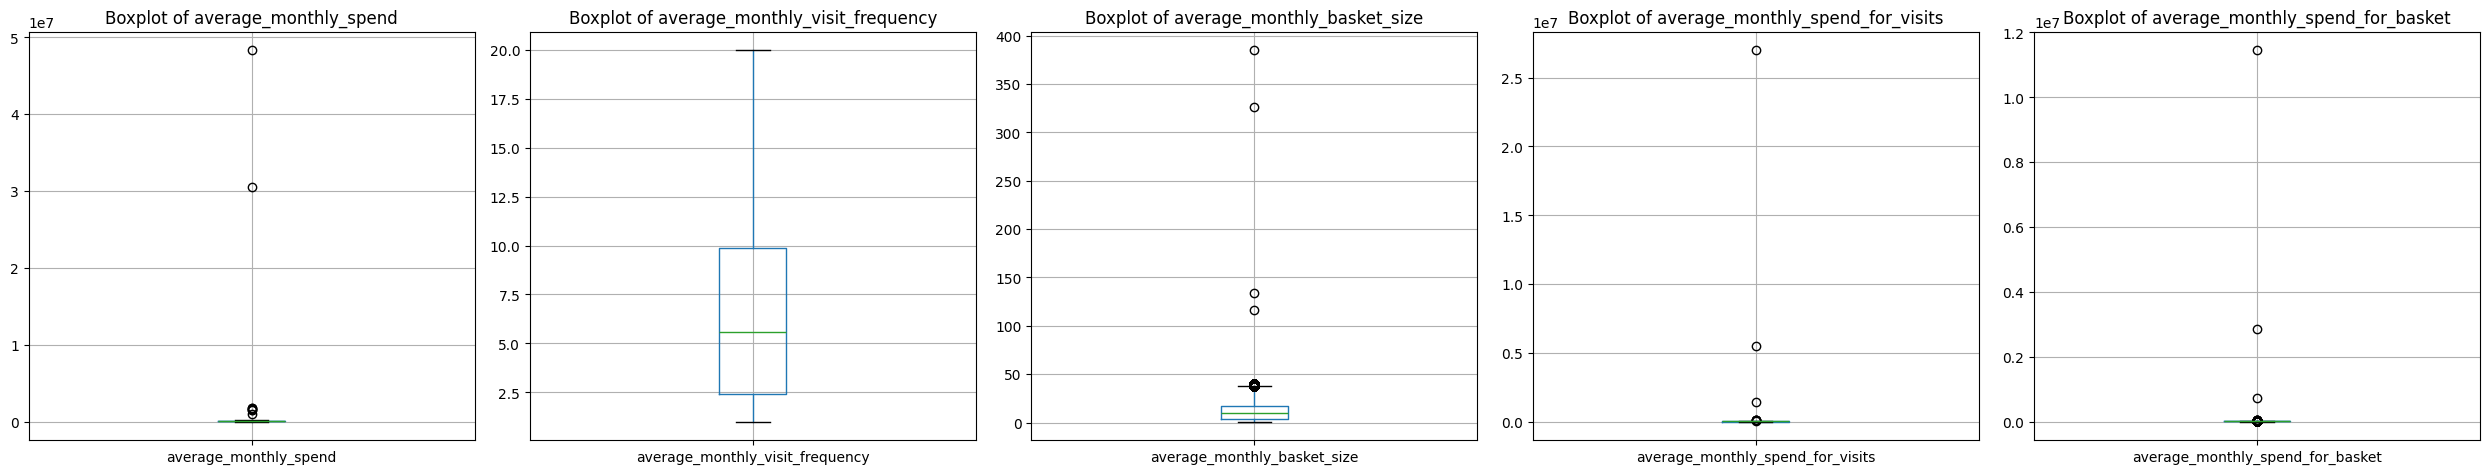

In [13]:
import matplotlib.pyplot as plt

num_columns = len(columns)

fig, axs = plt.subplots(nrows=1, ncols=num_columns, figsize=(5*num_columns, 5))

for ax, column in zip(axs, columns):
    df_filled_o[[column]].boxplot(ax=ax)
    ax.set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

according to above graph there are  some anomalies

### **Remove Outliers**

In [14]:
def remove_outliers(df, column):
    """
    Remove outliers from a DataFrame based on a specified column using the IQR method.
    - This function assumes the input DataFrame contains numerical data.
    - Outliers are identified and removed using the 1.5 Interquartile Range (IQR) method.
    """

    # Calculate quartiles and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return DataFrame without outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


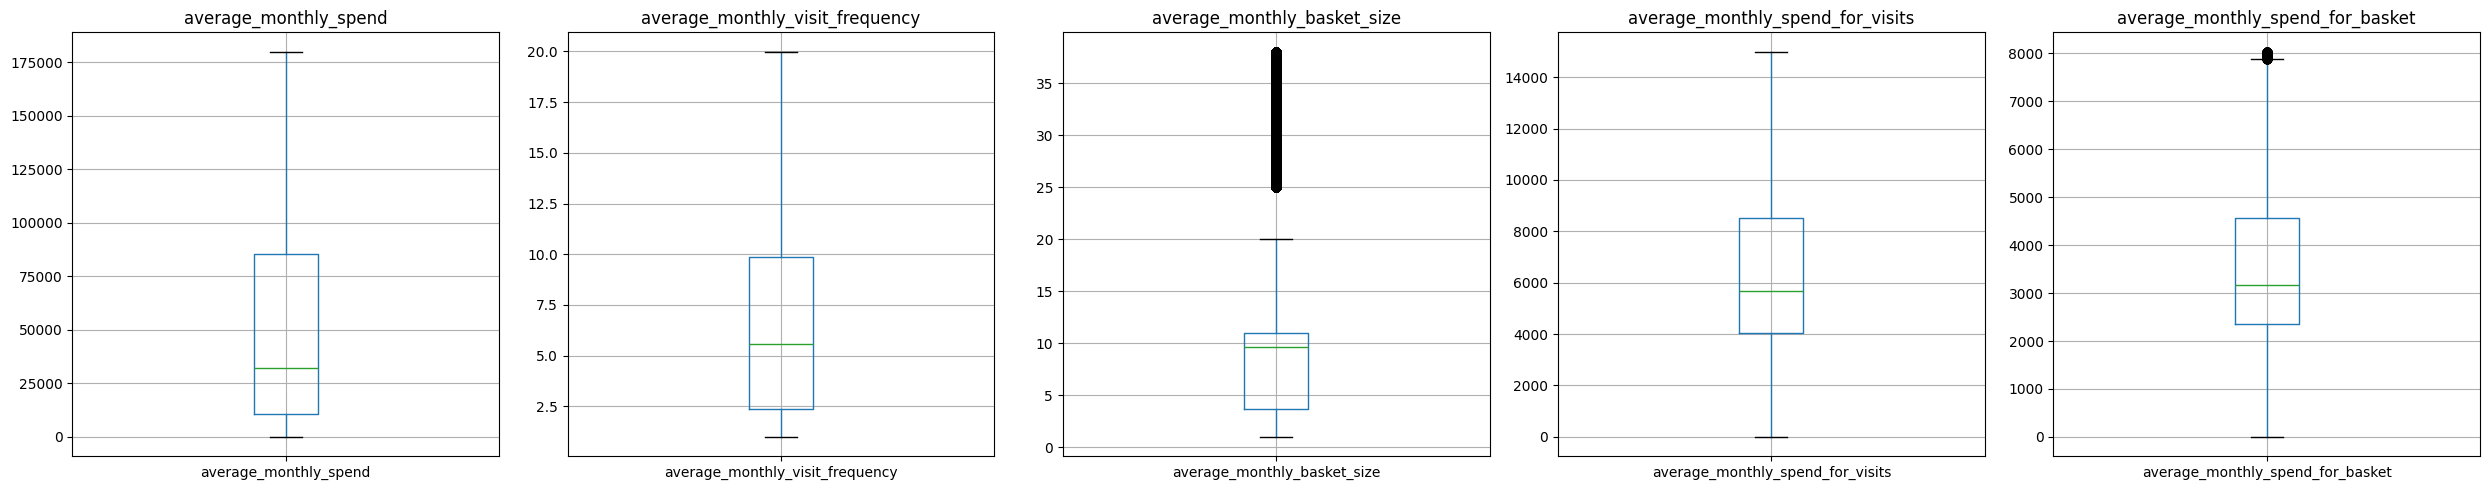

In [15]:
# Define the layout for subplots (1 row, multiple columns)
fig, axs = plt.subplots(nrows=1, ncols=num_columns, figsize=(5*num_columns, 5))

# Plot each column in a separate subplot after removing outliers
for ax, column in zip(axs, columns):
    df_filled = remove_outliers(df_filled_o, column)
    df_filled[[column]].boxplot(ax=ax)
    ax.set_title(column)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### **Data Distribution**

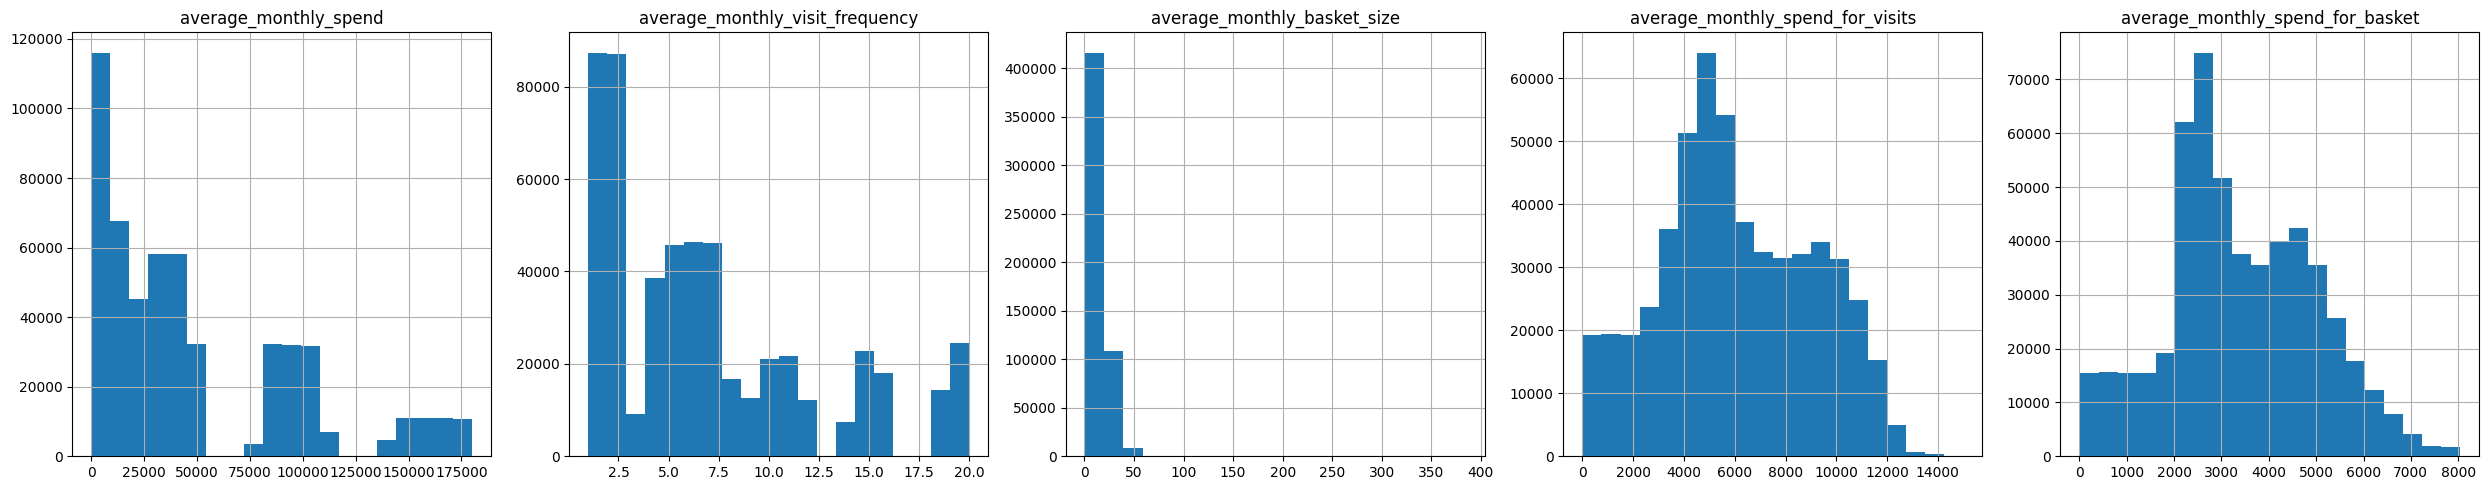

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=num_columns, figsize=(5*num_columns, 5))

# Plot each column in a separate subplot
for ax, column in zip(axs, columns):
    df_filled[column].hist(bins=20, ax=ax)
    ax.set_title(column)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#### **Plot Random Samples**

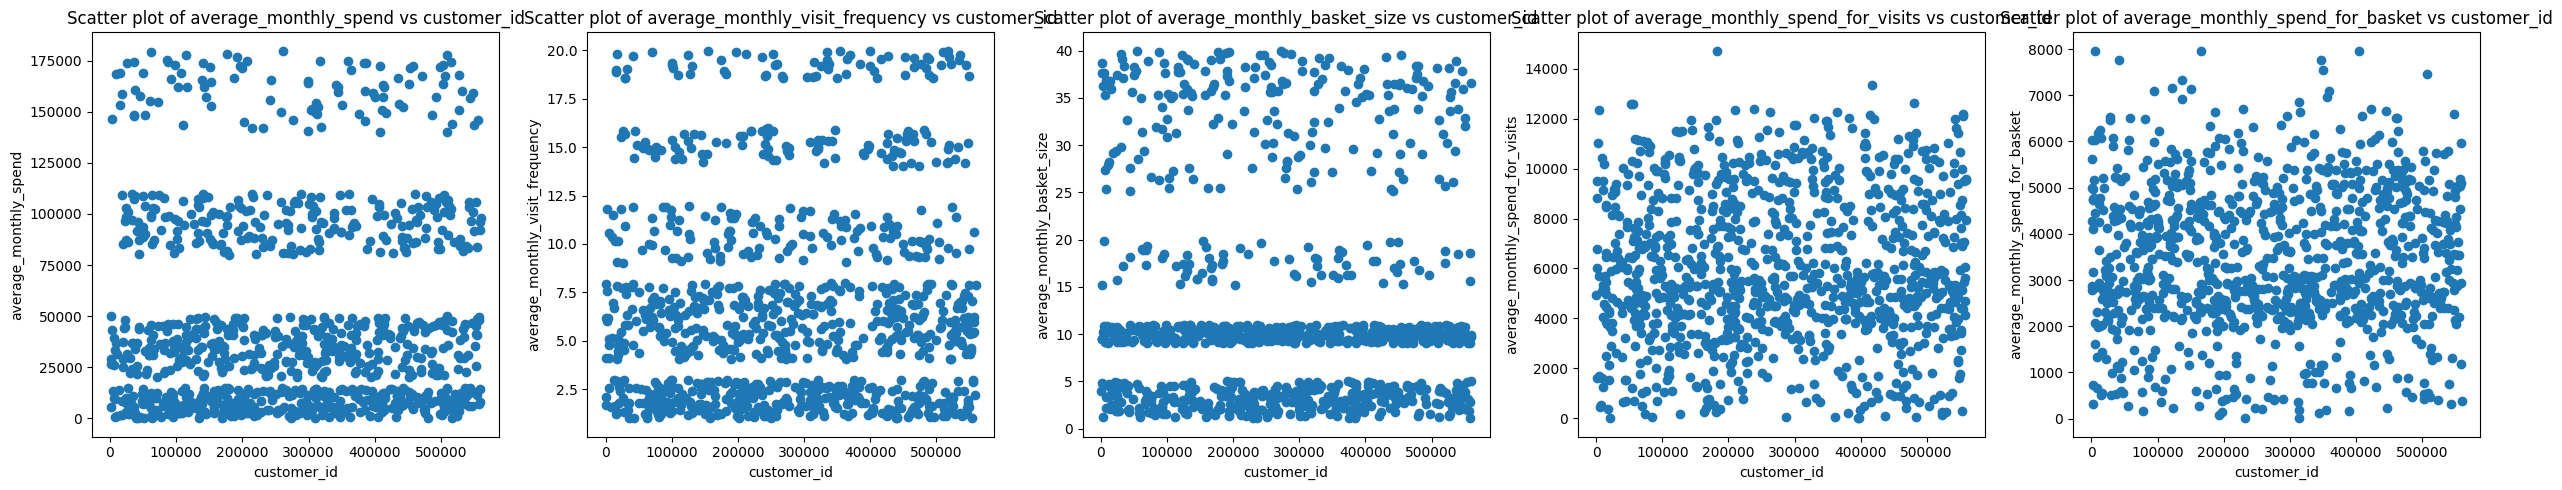

In [17]:
import matplotlib.pyplot as plt

def plot_scatter(df, x_column, y_column, ax):
    ax.scatter(df[x_column], df[y_column])
    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)
    ax.set_title(f'Scatter plot of {y_column} vs {x_column}')

num_columns = len(columns)

fig, axs = plt.subplots(nrows=1, ncols=num_columns, figsize=(5*num_columns, 5))

for ax, column in zip(axs, columns):
    plot_scatter(df_filled.sample(1000), 'customer_id', column, ax)

plt.tight_layout()
plt.show()

### **Elbow method to verify data preprocessed clearly**

In [18]:
df_filled.columns

Index(['customer_id', 'average_monthly_spend',
       'average_monthly_visit_frequency', 'average_monthly_basket_size',
       'average_monthly_spend_for_visits', 'average_monthly_spend_for_basket'],
      dtype='object')

#### **Feature Selection**

In [19]:
from sklearn.cluster import KMeans , DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

scaler = StandardScaler()

"""
    running few tests to find the best number of clusters these are the results that performed best to solve the problem
"""

X  = df_filled[["average_monthly_visit_frequency", "average_monthly_basket_size", "average_monthly_spend_for_basket"]]
#X = df_filled[columns]
X_scaled = scaler.fit_transform(X)

##### **Elbow method for Scaled Data**

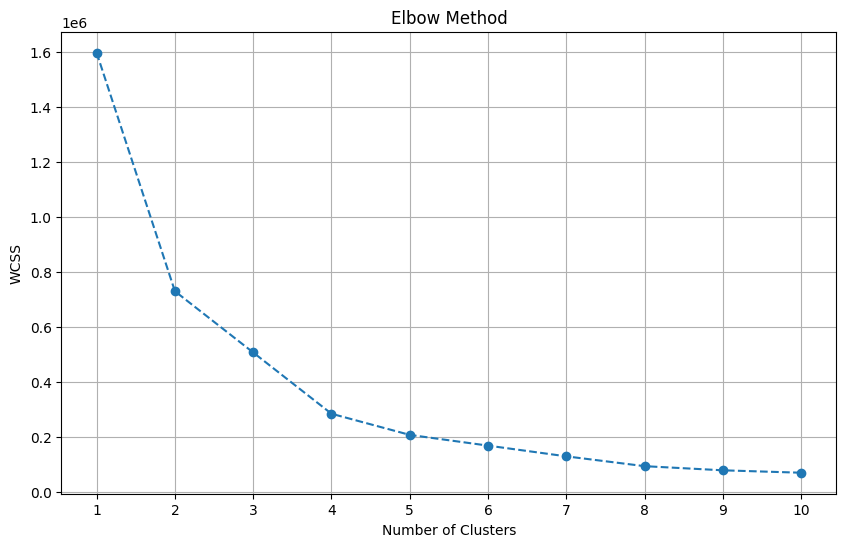

In [20]:
wcss = []
max_clusters = 10  # Define the maximum number of clusters to test

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)  # Set n_init explicitly
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Step 3: Plot the WCSS values to visualize the elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()


##### **Elbow method for  Non Scaled Data**

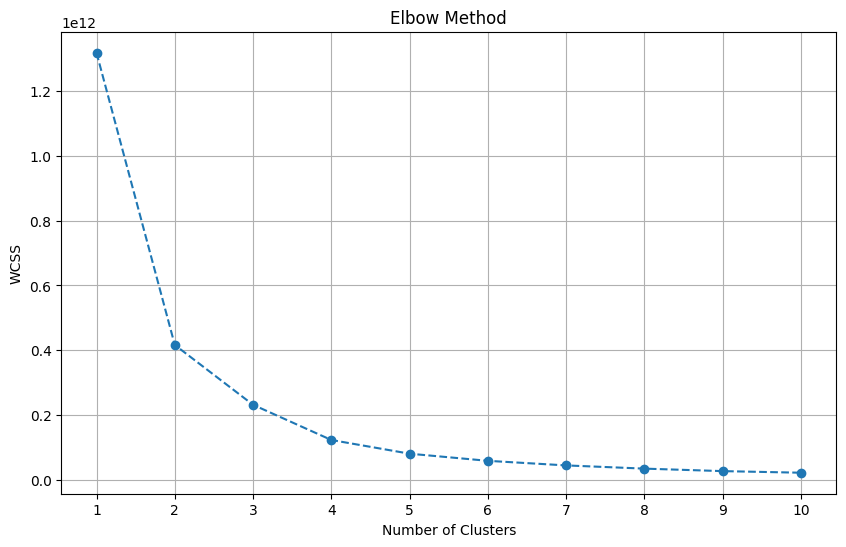

In [21]:
wcss = []
max_clusters = 10  # Define the maximum number of clusters to test

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)  # Set n_init explicitly
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Step 3: Plot the WCSS values to visualize the elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

according to above plots non scaled data shows that non scaled data cluster well to 5. and also after few test runs we identified Non Scaled data set is perform well to solve the problem

### **Model Building**

In [22]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

gmm = GaussianMixture(n_components=5, random_state=0)
  
df_filled['cluster'] = gmm.fit_predict(X)

/tmp/ipykernel_1937/1567167524.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filled['cluster'] = gmm.fit_predict(X)


#### **Evaluate Model**

In [23]:
# get a sample of the data
df_sample = df_filled.sample(20000)
X = df_sample[columns]

In [24]:
# Calculate the silhouette score GMM model
gmm_silhouette = silhouette_score(X, df_sample['cluster'] )
print(f"GMM Silhouette Score: {gmm_silhouette}")

GMM Silhouette Score: 0.5700906782136909


In [25]:
gmm_davies_bouldin = davies_bouldin_score(X, df_sample['cluster'] )
print(f"GMM Davies-Bouldin Score: {gmm_davies_bouldin}")

GMM Davies-Bouldin Score: 1.4288887667654826


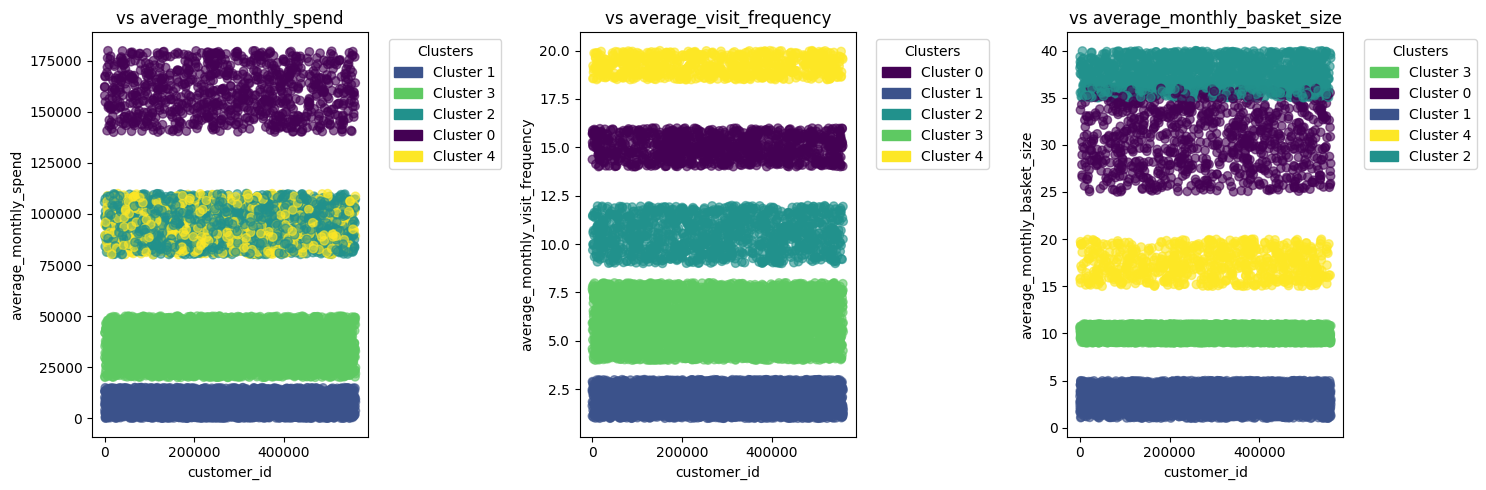

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_scatter_with_cluster(df, x_column, y_column, ax, title):
    scatter = ax.scatter(df[x_column], df[y_column], c=df['cluster'], cmap='viridis', alpha=0.6)
    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)
    ax.set_title(title)
    
    # Create a legend
    handles = []
    for cluster in df['cluster'].unique():
        handles.append(mpatches.Patch(color=scatter.cmap(scatter.norm(cluster)), label=f'Cluster {cluster}'))
    ax.legend(handles=handles, title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

num_columns = 3

# Custom titles for each subplot
titles = ["vs average_monthly_spend", "vs average_visit_frequency", "vs average_monthly_basket_size"]

fig, axs = plt.subplots(nrows=1, ncols=num_columns, figsize=(5*num_columns, 5))

for ax, column, title in zip(axs, columns[:3], titles):
    plot_scatter_with_cluster(df_filled.sample(10000), 'customer_id', column, ax, title)

plt.tight_layout()
plt.show()


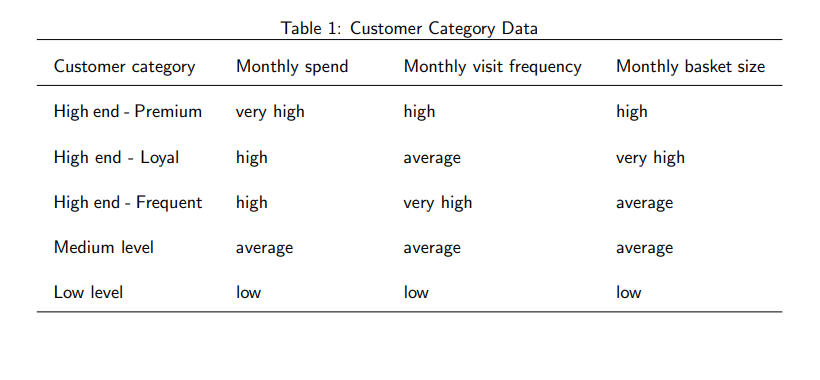

In [27]:
from IPython.display import Image, display

# Display the image
img_path = 'cluster_chart.png'  # Update with the path to your PNG file
display(Image(filename=img_path))

comparing to above table given in the problem plotted chart is is similar.

represented classes
- High end Premimum  = cluster 0
- High end Loyal  = cluster 2
- High end Frequent = cluster 4
- Medium Level = cluster 3
- Low Level - cluster1

### **Percentile Rules**

##### **find percentiles of average_monthly_spend**

to genaralize we used IQR range here 25% as bottom margin and 75% top margin

In [28]:
def percentile_average_monthly_spend(value):
    sorted_df = df_filled.sort_values(by=column)
    n = sorted_df.shape[0]  # Total number of observations
    cumulative_dist = (sorted_df["average_monthly_spend"] <= value).sum() / n
    percentile = cumulative_dist * 100
    
    return percentile

In [29]:
summary = df_filled.groupby('cluster')['average_monthly_spend'].describe().reset_index()

# make dataframe from the summary
summary.set_index(summary.index, inplace=True)

summary_df = pd.DataFrame(summary)
summary_df = summary_df.sort_values(by='25%', ascending=False)

summary_df['lower_percentile'] = summary_df['25%'].apply(percentile_average_monthly_spend)
summary_df['upper_percentile'] = summary_df['75%'].apply(percentile_average_monthly_spend)


average_monthly_spend = pd.DataFrame()

average_monthly_spend['cluster'] = summary_df['cluster']
average_monthly_spend['lower_percentile'] = summary_df['lower_percentile']
average_monthly_spend['upper_percentile'] = summary_df['upper_percentile']

print(average_monthly_spend)

   cluster  lower_percentile  upper_percentile
0        0         93.181190         97.727251
4        4         75.964001         85.957217
2        2         75.889020         85.882236
3        3         43.617643         61.817861
1        1          8.629642         25.889114


##### **find percentiles of average_monthly_visit_frequency**

In [30]:
def percentile_average_monthly_visit_frequency(value):
    sorted_df = df_filled.sort_values(by=column)
    n = sorted_df.shape[0]  # Total number of observations
    cumulative_dist = (sorted_df["average_monthly_visit_frequency"] <= value).sum() / n
    percentile = cumulative_dist * 100
    
    return percentile

In [31]:
summary = df_filled.groupby('cluster')['average_monthly_visit_frequency'].describe().reset_index()
summary.set_index(summary.index, inplace=True)
summary_df = pd.DataFrame(summary) 
summary_df = summary_df.sort_values(by='25%', ascending=False)

summary_df['lower_percentile'] = summary_df['25%'].apply(percentile_average_monthly_visit_frequency)
summary_df['upper_percentile'] = summary_df['75%'].apply(percentile_average_monthly_visit_frequency)

average_monthly_visit_frequency = pd.DataFrame()

average_monthly_visit_frequency['cluster'] = summary_df['cluster']
average_monthly_visit_frequency['lower_percentile'] = summary_df['lower_percentile']
average_monthly_visit_frequency['upper_percentile'] = summary_df['upper_percentile']

print(average_monthly_visit_frequency)

   cluster  lower_percentile  upper_percentile
4        4         94.566563         98.210779
0        0         85.916250         90.458552
2        2         74.099235         80.470410
3        3         43.679094         61.818236
1        1          8.783739         25.907342


##### **find percentiles of average_monthly_basket_size**

In [32]:
def percentile_average_monthly_basket_size(value):
    sorted_df = df_filled.sort_values(by=column)
    n = sorted_df.shape[0]  # Total number of observations
    cumulative_dist = (sorted_df["average_monthly_basket_size"] <= value).sum() / n
    percentile = cumulative_dist * 100
    
    return percentile

In [33]:
summary = df_filled.groupby('cluster')['average_monthly_basket_size'].describe().reset_index()
summary.set_index(summary.index, inplace=True)
summary_df = pd.DataFrame(summary) 
summary_df = summary_df.sort_values(by='25%', ascending=False)

summary_df['lower_percentile'] = summary_df['25%'].apply(percentile_average_monthly_basket_size)
summary_df['upper_percentile'] = summary_df['75%'].apply(percentile_average_monthly_basket_size)

average_monthly_basket = pd.DataFrame()

average_monthly_basket["cluster"] = summary_df["cluster"]
average_monthly_basket['lower_percentile'] = summary_df['lower_percentile'] 
average_monthly_basket['upper_percentile'] = summary_df['upper_percentile']

print(average_monthly_basket)

   cluster  lower_percentile  upper_percentile
2        2         90.480727         96.831231
0        0         80.464021         85.014216
4        4         72.744681         76.382883
3        3         43.643952         61.853566
1        1          8.641105         25.901893


### **Rules to Define Segment**

#### **High end Premimum  = cluster 0**
 - average_monthly_spend between 93.181190 and 97.727251
 - average_monthly_visit_frequency between 85.916250 and 90.458552
 - average_monthly_basket_size between 80.464021 and 85.014216

#### **High end Loyal  = cluster 2**
 - average_monthly_spend between 75.889020 and 85.882236
 - average_monthly_visit_frequency between 74.099235 and 80.470410
 - average_monthly_basket_size between 90.480727 and 96.831231

#### **High end Frequent = cluster 4**
 - average_monthly_spend between 75.964001 and 85.957217
 - average_monthly_visit_frequency between 94.566563 and 98.210779
 - average_monthly_basket_size between 72.744681 and 76.382883

#### **Medium Level = cluster 3**
 - average_monthly_spend between 43.617643 and 61.817861
 - average_monthly_visit_frequency between 43.679094 and 61.818236
 - average_monthly_basket_size between 43.643952 and 61.853566

#### **Low Level - cluster1**
 - average_monthly_spend between 8.629642 and 25.889114
 - average_monthly_visit_frequency between 8.783739 and 25.907342
 - average_monthly_basket_size between 8.641105 and 25.901893
